# COGS 118A - Final Project

# Names


- Jacob Au
- Evan Liu
- Lauren Lui
- Rina Kaura

# Abstract 

The focus of our project is centered around predicting an individual’s quality of sleep based on an individual’s exercise habits and thus hopefully improving the quality of sleep. The goal of our project is to implement a model which accurately predicts and improves the quality of sleep. We will examine data collected from Lifesnaps Fitbit data which obtained various information on the exercise such as activity type, sleep duration, the amount of minutes to fall asleep, sleep efficiency, number of activity minutes, and BPM. With the collected data, we will utilize a linear regression model to make predictions and identify relationships between an individual’s quality of sleep and the exercise features as listed above. The performance of our linear regression model will be assessed using the R-squared metric. 


# Background

There is a lot of prior research investigating the correlation between exercise and sleep quality. The general consensus tends to be that exercise can improve sleep quality and duration for all age groups[1]. However, some studies show that exercise has a greater positive effect on people over 40 years of age than under[2], especially when these older individuals live a rather sedentary life[4]. Exercise has also been shown to be an effective substitute for pharmacological interventions to improve sleep quality in insomniacs[3]. The participants in our dataset come from a wide range of age groups and fall everywhere on the scale of sedentary to active lifestyle. Luckily, whether their exercise consisted of walking, cycling, aerobics, or sports shouldn’t affect the effectiveness of our model since prior research shows increases in exercise intensity and duration doesn’t appear to have significant effects on sleep quality[5]. With the existing body of knowledge, we know that there is indeed a correlation between exercise and sleep that we hope to predict with our model. 
One unanswered question from the literature is how strong the correlation between exercise and sleep quality is. The studies investigating the correlation were mostly just trying to find its existence and not its strength. The studies testing the strength of the correlation had biases and limitations that call their findings into question. Many of them had a majority, if not solely, male subject group for their study which is not a representative sample. Hence, with a representative database, our group is aiming to test the correlation between exercise and sleep quality by seeing if we can successfully train a model to predict sleep quality based on type, duration, and intensity of exercise. There is a risk of there not being a strong correlation between the two variables, but that is also something our group is willing to investigate and debunk or prove.

# Problem Statement

The problem our project aims to address is improving the quality of an individual’s sleep based on one’s exercise habits, which is quantifiable, measurable, and replicable. We predict that exercise and quality of sleep must be correlated. This begs the question of how. What kind of exercise? How much exercise? When do you exercise? How do these factors affect your quality of sleep? Thanks to recent advances in personal technology, in particular the Fitbit, we are able to easily gain lots of quantitative data on people’s sleeping (rem/sleep ratio, duration, etc) and exercise habits (kind of exercise, heart rate, calories burned). Using these metrics, we should be able to accurately predict how an individual's exercising habits affect their sleep quality.


# Data

**Dataset Name:** Lifesnaps Fitbit Dataset

**Link to the dataset:** https://www.kaggle.com/datasets/skywescar/lifesnaps-fitbit-dataset

**Number of variables:** 63

**Number of observations:** 7,410

**Description:** Each observation in this dataset represents information collected regarding a specific fitbit user’s activity and device usage statistics over the course of a single day. The data from each observation was collected from one of 71 willing study participants.

**Critical Variables:** For the purposes of the present analysis, some of the notable variables from the aforementioned dataset include:
- **id:** Numeric representation of individual study participantnremhrs: Number of minutes of REM sleep logged in a single night (not hours)
- **minutesAsleep:** Number of minutes of total sleep logged in a single night
- **sleep_rem_ratio:** Proportion of sleep minutes occupied by REM sleep
- **bpm:** Average daily beats per minute
- **activityType:** List of all activities a user engaged in during a single day
- **sedentary_minutes:** Number of minutes spent idling in a single day
- **lightly_active_minutes:** Number of minutes spent engaging in light physical activity in a single day
- **moderately_active_minutes:** Number of minutes spent engaging in moderate physical activity in a single day
- **very_active_minutes:** Number of minutes spent engaging in strenuous physical activity in a single day
- **steps:** Total number of steps walked over the course of a single day

**Required Transformations:** 

Before operating on the original dataset in its given form, our group felt the need to refactor both the data and labels found within it in order to simplify the data extraction and identification processes. For example, the original dataset utilizes certain inconsistent column labeling schemes that make the task of identifying relevant columns more difficult, as in the case of camel-case labels clashing with underline-separated ones. Standardizing the naming convention of these multi-word labels, as well as refactoring labels with unintuitive names such as “nremhrs” which actually describes the number of minutes of REM sleep for a given user, is anticipated to help our group quickly and effectively utilize the dataset in our model. Additionally, given that certain metrics within the original dataset are recorded in different units despite the fact that columns with similar contents have different units, we also felt it necessary to standardize the numerous time-related metrics to be recorded in terms of minutes rather than hours and milliseconds. This transformation, we anticipated, would allow us to more easily apply a single model to our data and prevent the generation of inaccurate regression lines born from misleading numerical trends.

In addition to these standardization steps, we also felt it necessary to remove any columns in the original dataset deemed unhelpful or potentially misleading for the model training task. In particular, some of the removed metrics included ambiguous values such as “spo2” and “scl_avg” which were not explicitly defined on the FitBit SDK, values related to one’s location at various points during the day, and values related to activity in different “zones”. Additionally, while information related to each subject’s health including BMI, gender, and age were considered in our analysis of the relationship between sleep quality and exercise, our team ultimately concluded that for the purposes of the present analysis, these variables were not directly related to the amount of exercise one engages in on a given day. As a result, these values were excluded from the design matrix used in our model training procedure, but still considered as potential confounds. Finally, when measuring the sleep duration of each subject represented in the original dataset, the values represented by “minutesToFallAsleep”, “minutesAsleep”, “minutesUntilWakeup”, and “minutesAwake” were displayed separately. To simplify the process of evaluating each subject’s time spent in sleep as defined by the FitBit SDK, these columns were combined into a single column in our final dataset.

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

df = pd.read_csv("daily_fitbit_sema_df_unprocessed.csv")

In [2]:
bad_cols = ['rmssd', 'spo2', 'responsiveness_points_percentage', 'badgeType', 
            'filteredDemographicVO2Max', 'mindfulness_session', 'minutes_in_default_zone_1', 
            'minutes_below_default_zone_1', 'minutes_in_default_zone_2','nightly_temperature',
            'minutes_in_default_zone_3', 'step_goal', 'min_goal', 'max_goal', 
            'step_goal_label', 'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'date', 
            'SAD', 'TENSE/ANXIOUS', 'TIRED', 'ENTERTAINMENT', 'GYM', 'HOME', 'calories', 
            'HOME_OFFICE', 'OTHER', 'OUTDOORS', 'TRANSIT', 'WORK/SCHOOL', 
            'scl_avg', 'age', 'gender', 'bmi', 'daily_temperature_variation', 
            'full_sleep_breathing_rate', 'Unnamed: 0', 'sleep_duration', 'id']

df = df.drop(columns=bad_cols)

Removing columns with either a lot of null data or information that is not relevant to our project. For example, a user's step goal or badges they earned should not impact the quality/quantity of sleep that they are getting

In [3]:
def amountOfSleep(row):
    return row.minutesAwake + row.minutesAsleep + row.minutesToFallAsleep + row.minutesAfterWakeup
df['sleep_time'] = df.apply(amountOfSleep, axis=1)
df = df.drop(columns = ['minutesAwake', 'minutesAsleep', 
                        'minutesToFallAsleep', "minutesAfterWakeup"])

Consolidating the amount of sleep the each user is sleeping a night by using the fitbit's built partitions of parts of sleep into one variable

In [4]:
def totalActive(row):
    return row.lightly_active_minutes + row.moderately_active_minutes + row.very_active_minutes
df['active_time'] = df.apply(totalActive, axis=1)

Consolidating all of the durations of different types of exercise into one overarching value. In the future we will be using this as the signifier of how much each person exercised. A tradeoff we made is not differentiating an intense vs moderate workout in order for greater interpretability and computation cost.

In [5]:
indexSleep = df[ df['sleep_points_percentage'].isnull() ].index
df.drop(indexSleep , inplace=True)

The main dependent variable that we are trying to predict is 'sleep_points_percentage', which is a fitbit score, ranging from 0-100, quantifying the quality of a user's sleep. Upon analyzing our dataset, we realized that many users have a score of 0 for their sleep_points_percentage. By the calculation of this metric, this should not be possible, so 0 is the equivalent of a null value, so we dropped all of the rows where the score was 0.

In [6]:
df = df.reset_index(drop=True) #resetting index
df.head()

,nremhr,stress_score,sleep_points_percentage,exertion_points_percentage,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,sleep_time,active_time
0,57.432,78.0,0.833333,0.675,6517.5,['Walk'],71.701565,149.0,24.0,33.0,713.0,62.073070,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,521.0,206.0
1,57.681,80.0,0.833333,0.725,7178.6,['Walk'],70.579300,132.0,25.0,31.0,704.0,62.121476,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,548.0,188.0
2,57.481,84.0,0.966667,0.725,6090.9,['Walk'],71.842573,112.0,27.0,31.0,710.0,62.263999,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,560.0,170.0
3,57.493,82.0,0.933333,0.725,6653.1,['Walk'],71.725477,133.0,21.0,37.0,622.0,62.368900,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,627.0,191.0
4,56.750,81.0,0.866667,0.725,9557.9,['Walk'],74.401028,136.0,42.0,54.0,647.0,61.965409,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,561.0,232.0


In [7]:
def normalize(columnName):
    df[columnName] = ((df[columnName]-df[columnName].min()) / 
                      (df[columnName].max() - df[columnName].min()))
    
toBeNormalized = ['nremhr', 'stress_score', 'distance', 'bpm', 'lightly_active_minutes', 'active_time',
                  'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes', 'exertion_points_percentage',
                 'resting_hr', 'sleep_efficiency', 'steps', 'sleep_time', 'sleep_points_percentage']

df = df[df.sleep_points_percentage != 0]

for col in toBeNormalized:
    normalize(col)

Upon further analyzing our cleaned data, we realized that there is a huge discrepancy in the range of values for different features. For example, a user could have thousands of steps in a day, but their average bpm can only go so high. As a result, we decided to normalize all of the columns whos values did not orginally fall between [0-1], so future algorithms do not overweight certain features who's ranges are naturally larger. 

In [8]:
df.head()

,nremhr,stress_score,sleep_points_percentage,exertion_points_percentage,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,sleep_time,active_time
0,0.345834,0.589744,0.705882,0.380952,0.218337,['Walk'],0.234729,0.252144,0.083045,0.089431,0.553719,0.368842,0.65,1.243243,0.987013,0.921642,1.341772,0.204885,0.597641,0.232082
1,0.350680,0.641026,0.705882,0.476190,0.240483,['Walk'],0.215711,0.222985,0.086505,0.084011,0.545455,0.370130,0.70,1.466667,1.142857,0.947566,1.197531,0.225622,0.633028,0.211604
2,0.346788,0.743590,0.941176,0.476190,0.204045,['Walk'],0.237118,0.188679,0.093426,0.084011,0.550964,0.373920,0.80,1.116883,0.858974,1.015038,1.670732,0.191432,0.648755,0.191126
3,0.347021,0.692308,0.882353,0.476190,0.222879,['Walk'],0.235134,0.224700,0.072664,0.100271,0.470156,0.376709,0.65,1.128205,1.129870,1.191729,1.588235,0.209107,0.736566,0.215017
4,0.332561,0.666667,0.764706,0.476190,0.320190,['Walk'],0.280474,0.229846,0.145329,0.146341,0.493113,0.365979,0.70,0.910256,0.871795,1.211896,1.090909,0.300357,0.650066,0.261661


Here is a sample of the final dataframe we are going to be using for our analysis.

# Proposed Solution

In order to predict a user’s quality of sleep from a selection of exercising features, we will be using linear or polynomial regression. This will allow us to find the relationships between the exercise factors and sleep, and make predictions about sleep quality. In determining whether or not these relationships are significant and can be applied to the extrapolation task, the coefficient of correlation between both sleep quality and exercise data may be considered in order to assess the extent to which both variables are interrelated. Using a train-validate-test split, we will also run cross validation to make predictions on what degree of polynomial we should try to fit. After finding the best degree, we will train our data, and see how it performs on the test set.

Furthermore, if we find that we have too many columns to predict from performing the above statement, we may use **Principal Component Analysis** to reduce the dimensions, and then perform the above process again on the reduced data set. 

In addition, we would compare the performance of our model to a benchmark model. By comparing the performance of our model to the benchmark model, such as another model of a multivariable linear regression, as shown in the study below[6], it will allow us to gain information on the accuracy of our solution. The model used in Brand et al. successfully predicted sleep efficiency from increased exercise exertion, shortened sleep onset time, increased deep sleep, and decreased light sleep using multiple linear regression as utilized by our proposed model and solution. Like Brand et al., we are using four independent variables to predict one dependent variable. However, while our study is also using exercise exertion to predict sleep efficiency,  we are additionally factoring in BPM, self-reported stress, and steps taken in a day. In that way, we deviate from the existing body of research, but not enough that the benchmark model can’t be used as a precedent for our study.

# Evaluation Metrics

As the proposed analysis involves the use of a linear regression model to make predictions about sleep quality based on different exercise-related metrics, it is expected that the evaluation metrics used to quantify the performance of the model could include Mean Squared Error Score (MSE), Mean Absolute Error Score (MAE), or R-Squared Score. Preliminarily, Mean Squared Error was deemed a valid evaluation metric because it involves qualifying model performance based on differences between true and model-predicted labels, which is a task made more simple and computationally inexpensive given the aforementioned model’s inherent linear projections. Additionally, because this performance measure involves squaring the numerical differences between true and predicted values, further standardization of the original dataset to prevent the generation of negative scores would not be required, allowing models generated in successive validation folds to be compared with minimal difficulty. One concession associated with this method, however, is that because the final evaluation metric involves squaring errors, the measure is inherently sensitive to extraneous values and outliers, and given the varied values associated with the exercise and sleep columns of the target dataset, it is likely that rows exist in the dataset that could generate unwieldy evaluation scores. To address these concerns, our group also considered utilizing Mean Absolute Error to assess model performance, which substitutes the squaring process of MSE with a summation of error magnitude to address potentially negative scores. Alternatively, our group also considered substantiating the results of either of the aforementioned metrics with R-Squared scores, which qualifies model performance by taking the ratio of the sum of squared residuals and the sum of squares total, the latter of which is computed by squaring the difference between column values and the mean of that column. Inherently, this measure provides heightened interpretability compared to the other metrics, representing the degree to which the model’s performance surpasses the mean at each datapoint, with 0 representing no improvement and 1 representing perfect fit.

# Results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Sleep Quality Regression: Sleep Points Percentage

(0.0, 1.0)

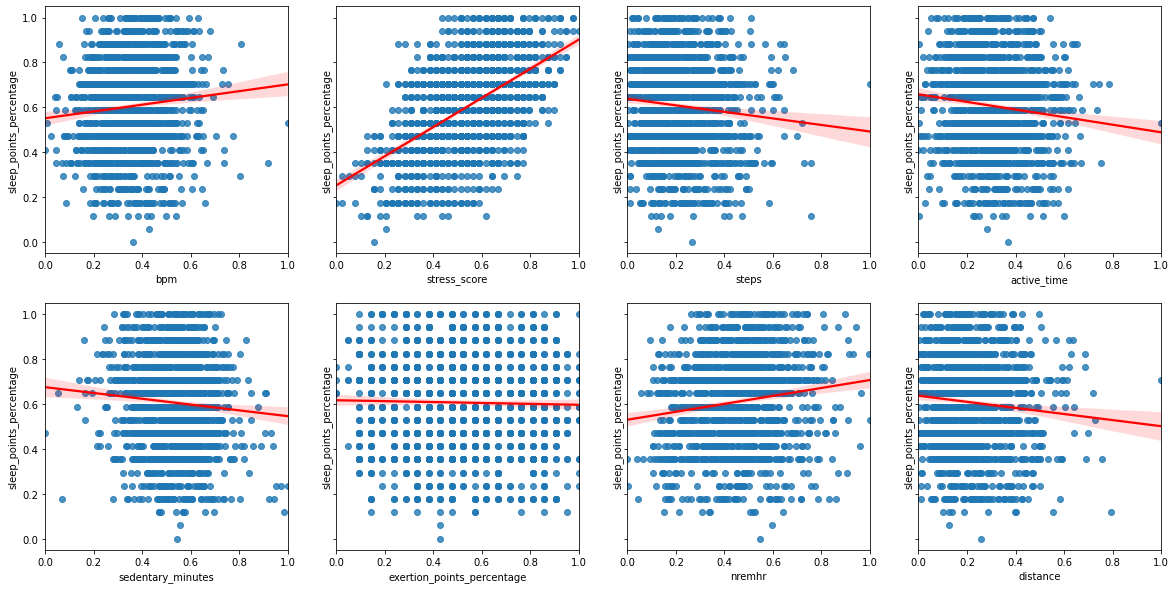

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)

sns.regplot(data = df, x = 'bpm', y = 'sleep_points_percentage', ax=axes[0][0], line_kws={"color": "red"})

sns.regplot(data = df, x = 'stress_score', y = 'sleep_points_percentage', ax=axes[0][1], line_kws={"color": "red"})#, scatter_kws={'alpha': 0.5})

sns.regplot(data = df, x = 'steps', y = 'sleep_points_percentage', ax=axes[0][2], line_kws={"color": "red"})

sns.regplot(data = df, x = 'active_time', y = 'sleep_points_percentage', ax=axes[0][3], line_kws={"color": "red"})

sns.regplot(data = df, x = 'sedentary_minutes', y = 'sleep_points_percentage', ax=axes[1][0], line_kws={"color": "red"})

sns.regplot(data = df, x = 'exertion_points_percentage', y = 'sleep_points_percentage', ax=axes[1][1], line_kws={"color": "red"})

sns.regplot(data = df, x = 'nremhr', y = 'sleep_points_percentage', ax=axes[1][2], line_kws={"color": "red"})

sns.regplot(data = df, x = 'distance', y = 'sleep_points_percentage', ax=axes[1][3], line_kws={"color": "red"})

axes[0][0].set_xlim(0,1)
axes[0][1].set_xlim(0,1)
axes[0][2].set_xlim(0,1)
axes[0][3].set_xlim(0,1)
axes[1][0].set_xlim(0,1)
axes[1][1].set_xlim(0,1)
axes[1][2].set_xlim(0,1)
axes[1][3].set_xlim(0,1)

In the graphs above we are plotting each feature in our dataset with respect to sleep_points_percentage, the value we are trying to predict. We are visualizing this in order to find a baseline hypothesis to figure out which features would be able to best predict sleep_points_percentage. Using the graphs above along with our background research, we hypothesize that stress_score, sedentary_minutes, active_time, and steps will be the best predictors of sleep quality.

In order to ascertain each user's sleep quality we will perform regressions on all possible combinations of 5 exercise-related metrics in the dataset ("bpm", "stress_score", "active_time", "sedentary_time","steps"). Because neither activity or sleep are assigned an objective measure of quality in the original dataset, the snippets below are used to accomodate for this uncertainty by evaluating the predictive potential of models according to all conceivable metrics for both categories, being included under the supposition that any correlations found by any of the numerous models would shed meaningful light onto the inherent relationships between exercise and sleep quality.

When evaluating the performance, models were qualified based on coefficients of determination (R2 scores) representing the observable difference between predicted sleep quality values and their corresponding ground truth values. Preliminarily, our group elected to qualify each subject's sleep quality according to their daily recorded "sleep points percentage" values, explicitly defined by the FitBit SDK to represent a general measure of a wearer's sleep quality and indicator of their sleeping habits [7].

The implementation and results of the models qualifying performance according to each subject's sleep point ratings are displayed in the following cells:

[7] https://help.fitbit.com/articles/en_US/Help_article/2439.htm

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import numpy as np
from matplotlib.pyplot import figure

In [11]:
exercise_metrics = []
for i in range(1,6):
    combs = list(itertools.combinations(['bpm', 'stress_score', 'steps', 'active_time', 'sedentary_minutes'], i))
    for j in range(len(combs)):
        combs[j] = list(combs[j])
        exercise_metrics.append(combs[j])
        
row_names = []

for i in range(1,6):
    combs = list(itertools.combinations(['bpm', 'stress_score', 'steps', 'active_time', 'sedentary_minutes'], i))
    for j in range(len(combs)):
        combs[j] = list(combs[j])
        str = ""
        for k in range(len(combs[j])):
            str += ''.join(combs[j][k])
            str += ", "
        str = str[:-2]
        row_names.append(str)

## Benchmark Analysis: Linear Regression

In order to determine the extent to which our tuned and optimized models succeed at predicting each subject's sleep quality, we felt it necessary to include a benchmark model against which we could compare the regression results of our optimized models. For this purpose, our group decided to utilize scikitlearn's LinearRegression model to generate a benchmark level of performance, a decision motivated by the fact that the 5 exercise-related metrics that were deemed relevant to the task of measuring each subject's activity level were selected primarily because they demonstrated the most linearly correlated relationship when plotted against the primary measure of sleep quality being measured. By utilizing the aforementioned model's inherently linear scoring procedures, we believed that the LinearRegression model would simultaneously allow us to verify whether or not the selection of the 5 exercise-related metrics accurately represented a general measure of subject activity as was predicted, as well as provide a naive baseline that could potentially be improved upon as we focused on tuning hyperparameters and selecting models in the future.

The following cell establishes this benchmark using the default parameters for scikit's LinearRegression model, training and testing it on the same random_state train and test splits as future models to preserve replicability and decipherability.

In [12]:
baseline_scores = []

for category in exercise_metrics:
    print(category)

    temp = df[['bpm', 'active_time', 'stress_score', 'steps', 'sedentary_minutes', 'sleep_points_percentage']].dropna()

    X = temp[category].to_numpy()
    y = temp['sleep_points_percentage'].to_numpy()
    
    baseline = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    baseline.fit(x_train, y_train)
    
    sc = r2_score(y_test, baseline.predict(x_test))
    
    print("R2 Score: %0.2f" % (sc))
    print("\n")
    
    baseline_scores.append(sc)

['bpm']
R2 Score: 0.01


['stress_score']
R2 Score: 0.24


['steps']
R2 Score: 0.00


['active_time']
R2 Score: 0.02


['sedentary_minutes']
R2 Score: -0.01


['bpm', 'stress_score']
R2 Score: 0.25


['bpm', 'steps']
R2 Score: 0.02


['bpm', 'active_time']
R2 Score: 0.04


['bpm', 'sedentary_minutes']
R2 Score: 0.00


['stress_score', 'steps']
R2 Score: 0.32


['stress_score', 'active_time']
R2 Score: 0.33


['stress_score', 'sedentary_minutes']
R2 Score: 0.24


['steps', 'active_time']
R2 Score: 0.01


['steps', 'sedentary_minutes']
R2 Score: -0.01


['active_time', 'sedentary_minutes']
R2 Score: 0.04


['bpm', 'stress_score', 'steps']
R2 Score: 0.35


['bpm', 'stress_score', 'active_time']
R2 Score: 0.38


['bpm', 'stress_score', 'sedentary_minutes']
R2 Score: 0.25


['bpm', 'steps', 'active_time']
R2 Score: 0.04


['bpm', 'steps', 'sedentary_minutes']
R2 Score: 0.01


['bpm', 'active_time', 'sedentary_minutes']
R2 Score: 0.07


['stress_score', 'steps', 'active_time']
R2 Score: 0.33

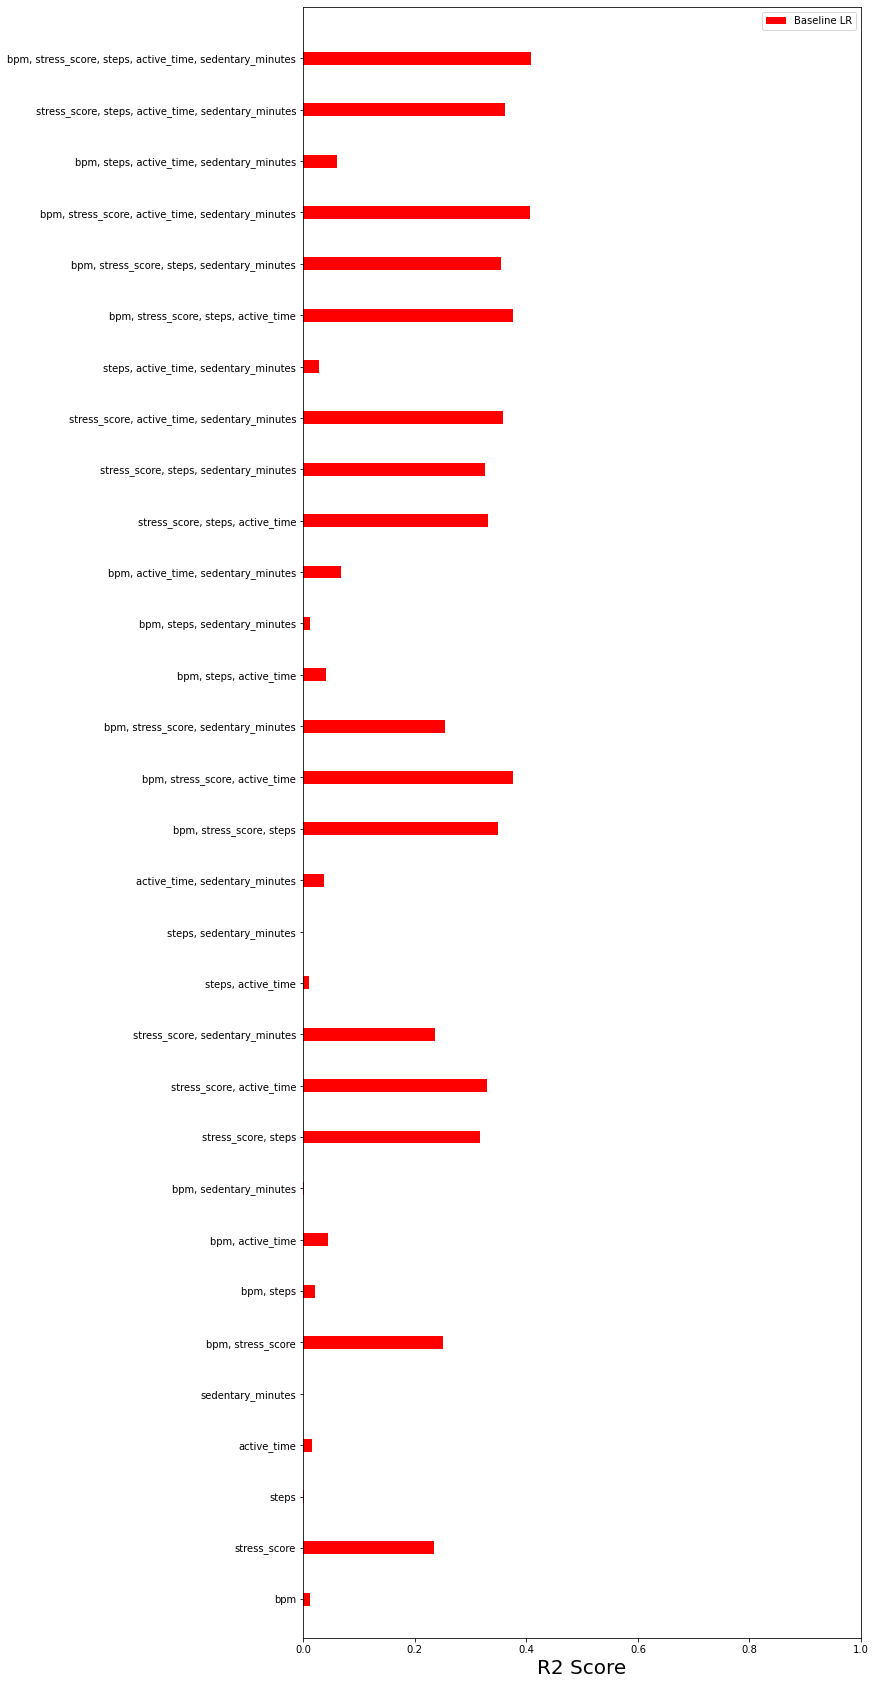

In [13]:
df_b = pd.DataFrame(dict(graph=row_names,n=baseline_scores)) 

ind = np.arange(len(df_b))
width = 0.25

fig, ax = plt.subplots()
ax.barh(ind, df_b.n, width, color='red', label='Baseline LR')

ax.set(yticks=ind, yticklabels=df_b.graph, xlim=[0, 1], ylim=[1*width - 1, len(df_b)])
ax.legend()

fig.set_figheight(30)
fig.set_figwidth(10)

plt.xlabel('R2 Score', fontsize=20)

plt.show()

In [14]:
print("Average baseline R2 score:", sum(baseline_scores) / len(baseline_scores))

Average baseline R2 score: 0.18120268710681875


As can be observed from the plots above, the benchmark LinearRegression model provides a number of notable insights that can potentially be extrapolated to represent the results of the future models. Notably, at least as pertains to the model's performance at evaluating sleep quality according to the provided sleep points metric, the LinearRegression model proved relatively ineffective at the prediction task for all 31 combinations of exercise metrics it was trained and tested on, boasting an average R2 score of 0.32 across all metrics and a maximum value of 0.41. This performance was expected of the benchmark model due to its naive parameter configuration and the relatively non-linear relationships found in the initial dataset, and yet due to the intentional selection of each exercise parameter represented in the 31 tested combinations, it was relatively unexpected that some of these metrics, such as steps or bpm, would generate R2 scores that were close to 0 and even negative. Ideally, each of the exercise metrics selected for training and testing would have demonstrated at least a marginal ability to accurately predict sleep quality, but even as some of combinations of these metrics, especially those containing only a single exercise metric, yielded close-to-zero R2 scores, our team felt that their continued consideration in the future optimized models might yield different patterns especially if the benchmark was intended to be a naive model.

Another observable pattern that can be observed from the above graph is that, with few exceptions, increasing the number of exercise metrics used to train and test the benchmark generally resulted in higher R2 scores. Contrary to the previous findings, this observation was expected to be true of any selected baseline model due to the fact that increasing the size of the design matrix sparingly introduces helpful constraints when training a model, especially considering the apparent non-linearity of the original dataset. Because of this non-linearity, it was already not expected that training and testing on single exercise metrics would yield high regression scores, even if these scores were far lower than anticipated, and our presuppositions proved to be relatively consistent with the above results.

Using these observed patterns and the quantitative results of the benchmark, our group now had a means to assess the results of more tuned models. The following cells present an exploration of three such models according to the same exercise and sleep quality metrics used above.

## Cross Validation Configuration: Sleep Points

In order to generate models with the greatest likelihood of succeeding at the regression task, our group elected to utilize grid search cross-validation to identify optimized parameter values for our selected models. The decision to utilize grid search as the primary cross-validation method came as a direct result of the uncertainty associated with our interpretations of exercise quality, wherein the quality of one's activity was measured according to one or more metrics that were not explicitly defined by the FitBit SDK to represent it. It was presupposed, however, that certain combinations of these metrics, with each metric contributing either marginally or significantly to a general measure of exercise quality, would be able to provide a means of evaluating sleep quality according to the proposed solution, and utilizing grid search rather than a non-exhaustive search like randomized search to iterate over every possible set of parameters for each combination of exercise metrics was expected to provide a thorough examination of each combination's ability to accomplish the regression task.

The second function in the cell below, "cross_val_eval" was consrtucted to facilitate the cross validation process for each selected regression model. The function takes as parameters a string representing the kind of model being used, and the appropriate parameters and model object are dynamically determined at runtime and fed into scikit's GridSearchCV function. After the grid search is completed, the optimized estimator parameters, designated by the "best_estimator_" attribute of the computed search object, is then used to compute a list of R2 scores representing the optimized model's success at the regression task over multiple iterations predicting on the test set. Throughout each successive grid search, the optimal parameters and their corresponding average R2 scoresfor each model are stored for future analysis, and the cross validation process is completed for each of the 31 combinations of exercise metrics. Finally, the mean R2 score for each of the combinations is stored in a list "eval_scores", which can then be visualized and compared in a horizontal bar plot.

In [15]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

model_map = {
    "polynomial": PolynomialRegression(),
    "tree": DecisionTreeRegressor(),
    "forest": RandomForestRegressor()
}

param_map = {
    "polynomial": {
            'polynomialfeatures__degree': [1,2,3,4], 'linearregression__fit_intercept': [True, False]
        },
    "tree": {'max_depth':[1, 2, 3, 4, 5, 10] , 'criterion': ["squared_error", "absolute_error"]},
    "forest": {'bootstrap':[True, False], 'max_depth':[1, 2, 3]}
}

maxR_spp = [0]
params_spp = [None, None]

def cross_val_eval(model):
    
    eval_scores = []
    
    for category in exercise_metrics:

        print(category)

        temp = df[['bpm', 'active_time', 'stress_score', 'steps', 'sedentary_minutes', 'sleep_points_percentage']].dropna()
        X = temp[category].to_numpy()

        y = temp['sleep_points_percentage'].to_numpy()

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        gscv = GridSearchCV(model_map[model], param_map[model], cv=5, scoring="r2", return_train_score=True)
        clf = gscv.fit(x_train, y_train)
    
        scores = cross_val_score(gscv.best_estimator_, x_test, y_test,
                cv=5, scoring='r2')
            
        if(scores.mean() > maxR_spp[0]):
            params_spp[0] = clf.cv_results_['mean_train_score']
            params_spp[1] = clf.cv_results_['mean_test_score']
            maxR_spp[0] = scores.mean()
    
        print("%0.2f mean R2 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        print("\n")
        
        eval_scores.append(scores.mean())
        
    return eval_scores

## Polynomial Regression

As a step up from the benchmark LinearRegression model, our group elected to utilize a polynomial regression model with an increased capacity for fitting complex, non-linear data to substantiate our original baseline findings. In addition to the model inherently relying on the construction of non-linear regression lines, we hypothesized that the generation of an optimized regression parameters would only further serve to improve the results of the model comopared to the benchmark.

In the cell below we are using scikit's PolynomialRegression model with a grid search, 5 fold validation. We are using 70% of our data to train and the remaining 30% to test our data. We are grid searching through different degrees and fit intercept to find the hyperparameters that best fit our dataset.

In [ ]:
polyreg_scores = cross_val_eval("polynomial");

['bpm']
-0.00 mean R2 score with a standard deviation of 0.05


['stress_score']
0.25 mean R2 score with a standard deviation of 0.09


['steps']
-0.01 mean R2 score with a standard deviation of 0.02


['active_time']
0.02 mean R2 score with a standard deviation of 0.01


['sedentary_minutes']
-0.02 mean R2 score with a standard deviation of 0.03


['bpm', 'stress_score']
0.25 mean R2 score with a standard deviation of 0.06


['bpm', 'steps']
-0.01 mean R2 score with a standard deviation of 0.08


['bpm', 'active_time']
0.01 mean R2 score with a standard deviation of 0.08


['bpm', 'sedentary_minutes']


## Decision Tree Regression

To supplement the benchmark LinearRegression model and the previously explored PolynomialRegression model, our group also elected to utilize a DecisionTree regressor to provide an estimator of comparison that is computationally fast and inexpensive given the characteristics of the dataset being analyzed. Because the number of features in each constructed design matrix is minimal with respect to the computational capabilities of the decision tree, the level of complexity the model can reasonably achieve when dealing with non-linear data, and the widespread acknolwedgement of the decision tree as one of the most powerful and popular machine learning models, we believed that it would be important to include optimized decision tree results to substantiate the aforementioned models.

In the cell below we are using the decision tree regression algorithm with a grid search, 5 fold validation. We are using 70% of our data to train and the remaining 30% to test our data. We are grid searching through the maximum depth of our tree to find the hyperparameters that best fit our dataset.

In [ ]:
tree_scores = cross_val_eval("tree");

## Random Forest Regression

The final model being used for the present analysis of sleep quality is the RandomForestRegressor, which was implemented to simultaneously substantiate the findings of the decision tree with a typically more accurate, albeit much slower regression model and address the same uncertainty concerns expressed in our justification of using grid search cross validation. while bulkier and computationally expensive compared to the other models, the random forest's impressive performance on large datasets and average-based regression strategy made it desirable to include in this analysis and was expected to perform the best when it came to the regression task.

In the cell below we are using the ensemble random forest regression algorithm with a grid search, 5 fold validation. We are using 70% of our data to train and the remaining 30% to test our data. We are grid searching through the maximum depth of our tree and whether to bootstrap or not to find the hyperparameters that best fit our dataset.

In [ ]:
forest_scores = cross_val_eval("forest")

Now that the average R2 scores for each of the 3 tuned models and the baseline model are known, the following cell compiles them into a single bar graph visualization. Each combination of training and testing exercise metrics is divided into four bars, each representing the R2 score for one of the regression models for that particular combination of metrics.

The cell beneath the bar graph also provides a validation curve visualization for the tuned model with the greatest R2 score of all those tested, listing both the maximum R2 value achieved and the training and test curves for the model that achieved it.

In [ ]:
df_1 = pd.DataFrame(dict(graph=row_names,n=polyreg_scores, m=tree_scores, o=forest_scores, b=baseline_scores)) 

ind = np.arange(len(df_1))
width = 0.20

fig, ax = plt.subplots()
polyreg_bar = ax.barh(ind - 0.3, df_1.n, width, color='orange', label='PolyReg')
tree_bar = ax.barh(ind - 0.1, df_1.m, width, color='green', label='Tree')
forest_bar = ax.barh(ind + 0.1, df_1.o, width, color='blue', label='Forest')
baseline_bar = ax.barh(ind + 0.3, df_1.b, width, color='red', label='Baseline LR')

ax.bar_label(polyreg_bar, padding=10, fontsize=8)
ax.bar_label(tree_bar, padding=10, fontsize=8)
ax.bar_label(forest_bar, padding=10, fontsize=8)
ax.bar_label(baseline_bar, padding=10, fontsize=8)

ax.set(yticks=ind, yticklabels=df_1.graph, xlim=[0, 1], ylim=[width - 1, len(df_1)])
ax.legend()

fig.set_figheight(25)
fig.set_figwidth(10)

plt.xlabel('R2 Score', fontsize=20)

plt.show()

In [ ]:
print(maxR_spp[0])

train_scores = params_spp[0]
test_scores = params_spp[1]

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.ylabel("R2 Score")
plt.legend(loc='best')
plt.show()

## Regression Analysis

# Sleep Quality Regression: Sleep Time

After running our models to try to predict sleep quality (sleep_percentage_score), we realized that while our models were doing better than guessing the average, they were not great at predicting sleep quality. In fact, the highest R-squared score we were able to produce was 0.42, when we used polynomial regression, predicting with steps, active time, sedentary time, and stress score. As a result, we looked to see if there was another aspect of sleep that we could accurately predict with our given variables: duration of sleep. Revisiting our dataset, we noticed that graphing the features with respect to sleep time gave us more correlated data than sleep quality. In the following cells, we perform the same process of regressions, but predicting sleep duration instead of sleep quality. 

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)

sns.regplot(data = df, x = 'bpm', y = 'sleep_time', ax=axes[0][0], line_kws={"color": "red"})

sns.regplot(data = df, x = 'stress_score', y = 'sleep_time', ax=axes[0][1], line_kws={"color": "red"})#, scatter_kws={'alpha': 0.5})

sns.regplot(data = df, x = 'steps', y = 'sleep_time', ax=axes[0][2], line_kws={"color": "red"})

sns.regplot(data = df, x = 'active_time', y = 'sleep_time', ax=axes[0][3], line_kws={"color": "red"})

sns.regplot(data = df, x = 'sedentary_minutes', y = 'sleep_time', ax=axes[1][0], line_kws={"color": "red"})

sns.regplot(data = df, x = 'exertion_points_percentage', y = 'sleep_time', ax=axes[1][1], line_kws={"color": "red"})

sns.regplot(data = df, x = 'nremhr', y = 'sleep_time', ax=axes[1][2], line_kws={"color": "red"})

sns.regplot(data = df, x = 'distance', y = 'sleep_time', ax=axes[1][3], line_kws={"color": "red"})

axes[0][0].set_xlim(0,1)
axes[0][1].set_xlim(0,1)
axes[0][2].set_xlim(0,1)
axes[0][3].set_xlim(0,1)
axes[1][0].set_xlim(0,1)
axes[1][1].set_xlim(0,1)
axes[1][2].set_xlim(0,1)
axes[1][3].set_xlim(0,1)

In [ ]:
baseline_scores = []

for category in exercise_metrics:
    print(category)

    temp = df[['bpm', 'active_time', 'stress_score', 'steps', 'sedentary_minutes', 'sleep_time']].dropna()

    X = temp[category].to_numpy()
    y = temp['sleep_time'].to_numpy()
    
    baseline = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    baseline.fit(x_train, y_train)
    
    sc = r2_score(y_test, baseline.predict(x_test))
    
    print("R2 Score: %0.2f" % (sc))
    print("\n")
    
    baseline_scores.append(sc)

In [ ]:
df_b = pd.DataFrame(dict(graph=row_names,n=baseline_scores)) 

ind = np.arange(len(df_b))
width = 0.25

fig, ax = plt.subplots()
ax.barh(ind, df_b.n, width, color='red', label='Baseline LR')

ax.set(yticks=ind, yticklabels=df_b.graph, xlim=[0, 1], ylim=[1*width - 1, len(df_b)])
ax.legend()

fig.set_figheight(30)
fig.set_figwidth(10)

plt.xlabel('R2 Score', fontsize=20)

plt.show()

In [ ]:
maxR_time = [0]
params_time = [None, None]

def cross_val_time(model):
    
    eval_scores = []
    
    for category in exercise_metrics:

        print(category)

        training_errors = []
        validation_errors = []

        temp = df[['bpm', 'active_time', 'stress_score', 'steps', 'sedentary_minutes', 'sleep_time']].dropna()
        X = temp[category].to_numpy()
        y = temp['sleep_time'].to_numpy()

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        gscv = GridSearchCV(model_map[model], param_map[model], cv=5, scoring="r2", return_train_score=True)
        clf = gscv.fit(x_train, y_train)
    
        scores = cross_val_score(gscv.best_estimator_, x_test, y_test,
                cv=5, scoring='r2')
        
        if(scores.mean() > maxR_time[0]):
            params_time[0] = gscv.cv_results_['mean_train_score']
            params_time[1] = gscv.cv_results_['mean_test_score']
            maxR_time[0] = scores.mean()
        
        print("%0.2f mean R2 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        print("\n")
        
        eval_scores.append(scores.mean())
        
    return eval_scores

## Polynomial Regression

In this cell we are defining a similar function to the one used above, but setting y_train and y_test equal to sleep_time, which is the length of time each user slept. The same model selection applies, where we are using a 5 fold grid search on the same hyperparameters and the same features we used to predict sleep quality.

In [ ]:
polyreg_scores = cross_val_time("polynomial");

## Decision Tree Regression

In the cell below we are using the decision tree regression algorithm with a grid search, 5 fold validation. We are using 70% of our data to train and the remaining 30% to test our data. We are grid searching through the maximum depth of our tree to find the hyperparameters that best fit our dataset.

In [ ]:
tree_scores = cross_val_time("tree");

## Random Forest Regression

In the cell below we are using the ensemble random forest regression algorithm with a grid search, 5 fold validation. We are using 70% of our data to train and the remaining 30% to test our data. We are grid searching through the maximum depth of our tree and whether to bootstrap or not to find the hyperparameters that best fit our dataset.

In [ ]:
forest_scores = cross_val_time("forest");

In [ ]:
df_2 = pd.DataFrame(dict(graph=row_names,n=polyreg_scores, m=tree_scores, o=forest_scores, b=baseline_scores)) 

ind = np.arange(len(df_2))
width = 0.20

fig, ax = plt.subplots()
polyreg_bar = ax.barh(ind - 0.3, df_2.n, width, color='orange', label='PolyReg')
tree_bar = ax.barh(ind - 0.1, df_2.m, width, color='green', label='Tree')
forest_bar = ax.barh(ind + 0.1, df_2.o, width, color='blue', label='Forest')
baseline_bar = ax.barh(ind + 0.3, df_2.b, width, color='red', label='Baseline LR')

ax.bar_label(polyreg_bar, padding=10, fontsize=8)
ax.bar_label(tree_bar, padding=10, fontsize=8)
ax.bar_label(forest_bar, padding=10, fontsize=8)
ax.bar_label(baseline_bar, padding=10, fontsize=8)

ax.set(yticks=ind, yticklabels=df_2.graph, xlim=[0, 1], ylim=[1*width - 1, len(df_2)])
ax.legend()

fig.set_figheight(25)
fig.set_figwidth(10)

plt.xlabel('R2 Score', fontsize=20)

plt.show()

In [ ]:
print(maxR_time[0])

train_scores = params_time[0]
test_scores = params_time[1]

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.ylabel("R2 Score")
plt.legend(loc='best')
plt.show()

Upon looking at the R-squared scores for sleep duration, we were able to successfully predict sleep duration to a much higher accuracy than sleep quality. Using a polynomial regression model, we were able to predict sleep duration with 0.81 accuracy (standard deviation 0.06). This is almost double the accuracy of our predictions of sleep quality.

# Discussion

## Interpreting the result

Our project sought out to utilize FitBit data to figure out what affects your quality of sleep and duration of sleep the most. We used three different types of regressions, polynomial, decision tree, and random forest on different combinations of features to predict both sleep quality and duration. After training and testing through numerous combinations of different features that linear/polynomial regression was able to predict both sleep duration(max R-squared: 0.42) and sleep quality(max R-squared: 0.81) the most consitently and accurately. On the other hand, random forests consistently performed the second best when trying to predict sleep quality(0.32), but performed the worst when trying to predict sleep duration(0.60). Finally, decision trees performed the worst for classifying sleep quality(0.24), but the second best when classifying sleep duration(0.64). While we were able to predict sleep quality somewhat accurately, we were able to predict sleep duration to almost two times the accuracy. 

Taking a deeper dive into which individual features are the most correlated to sleep duration and accuracy, our data shows that stress_score is the most correlated to sleep quality and amount of sedentary time is the most correlated with sleep duration. Based off of our background research, it is unsurprising that stress is highly correlated with sleep quality, as stress often makes it hard to relax, as it activates our sympathetic nervous system. However, even though stress is the variable most correlated to sleep quality, stress alone was not enough to accurately predict sleep quality. After running our regressions, stress by itself was able to achieve an R-squared score of 0.25, while other features, such as number of steps, average bpm, and active time, had R-squared scores of below zero or zero. However, when paired with these other features the R-squared score rises to 0.42. 

On the other hand, the length of time someone was sedentary was the most correlated feature to the amount of sleep an individual got: the more you sat around, the less you slept. After running linear regression with only sedentary time, it got an R-squared score of 0.11. However, this result was particularly surprising in relation to active time, which got an R-squared score of 0.03. This means that the amount you are sedentary is more indicative of the amount of sleep than how much you exercise. Finally, the biggest jumps in improvement of R-squared scores for all of our model selections, for both sleep quality and duration, was when you pair sedentary minutes with steps or active time. When pairing sedentary time with steps, the R-squared score jumps all the way to 0.53 (0.11 from sedentary time alone and -0.10 from steps alone). An even bigger jump is when you pair sedentary minutes with active time (0.03), the R-squared score jumps to 0.80. This means that sedentary minutes in conjunction with how much you exercise is extremely indicative of the amount of sleep you are going to get.

## Ethics & Privacy

As our dataset has a lot of personal health and exercise information, it is important that our participants remain anonymous. Although the participants gave consent to participate in the study and the data was collected unobtrusively, through a fitbit, it is possible to backtrack their identities in conjunction with their demographic information. Furthermore, because our project is so aligned with discovering what constitutes healthy exercising and sleeping patterns, we may be unintentionally promoting unhealthy exercise, dietary, and sleep habits. Health is not a one size fits all type situation, so we will take extra caution when discussing our findings.


## Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

## Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.